## Thera Bank Personal Loan Campaign

#### Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


#### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

#### Attributes
* ID         : Customer ID		                                
* Age       : Customer's age in completed years					
* Experience  : #years of professional experience		
* Income : Annual income of the customer (thousands)
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer	
* CCAvg : Avg. spending on credit cards per month (thousands)	
* Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional		
* Mortgage : Value of house mortgage if any. (thousands)
* Personal Loan : Did this customer accept the personal loan offered in the last campaign?
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?	
* Online : Does the customer use internet banking facilities?	
* Credit card : Does the customer use a credit card issued by UniversalBank?

### 1]  Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

[Article 1](https://towardsdatascience.com/stop-saying-precision-and-recall-to-business-leaders-f17082ab5052)

[Article 2](https://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=BA59D882AADB07127B783D826D2D6597?doi=10.1.1.33.1337&rep=rep1&type=pdf)

[Article 3](https://arxiv.org/pdf/1511.02980.pdf)


[ROC Cuver threshold 1](https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python)

[ROC Cuver threshold 2](https://stackoverflow.com/questions/56203889/how-to-get-the-optimal-threshold-from-roc-curve-in-python)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

In [4]:
# importing data

df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()      # used to see top 5 rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## EDA

### 2]  EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

Number of unique in each column?

Number of people with zero mortgage?

Number of people with zero credit card spending per month?

Value counts of all categorical columns.

Univariate and Bivariate

Get data model ready


In [5]:

# Column descriptions

## Data Description:

##	ID	Customer ID

##	Age	Customer's age in completed years

##	Experience	#years of professional experience

##	Income	Annual income of the customer ($000)

##	ZIPCode	Home Address ZIP code.

##	Family	Family size of the customer

##	CCAvg	Avg. spending on credit cards per month ($000)

##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

##	Mortgage	Value of house mortgage if any. ($000)

##	Personal Loan	Did this customer accept the personal loan offered in the last campaign? 0 - False and 1 - True

##	Securities Account	Does the customer have a securities account with the bank? 0 - False and 1 - True

##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank? 0 - False and 1 - True

##	Online	Does the customer use internet banking facilities? 0 - False and 1 - True

##	CreditCard	Does the customer use a credit card issued by UniversalBank? 0 - False and 1 - True

In [6]:
df.shape

(5000, 14)

In [7]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
df.dtypes        ## this would give datatype of each column

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
df.isnull().sum()  #check for null Values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:>

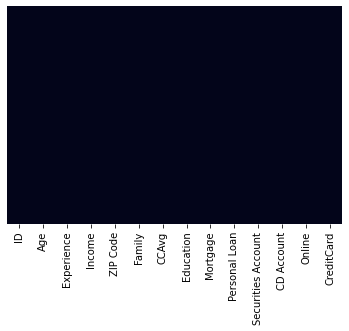

In [11]:
sns.heatmap(df.isna(), yticklabels = False, cbar = False)

<AxesSubplot:>

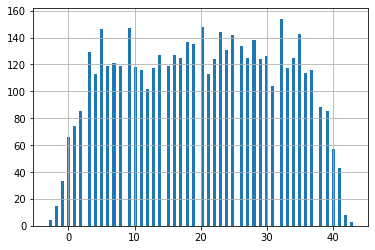

In [12]:
df['Experience'].hist(bins = 100)

In [13]:
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [14]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


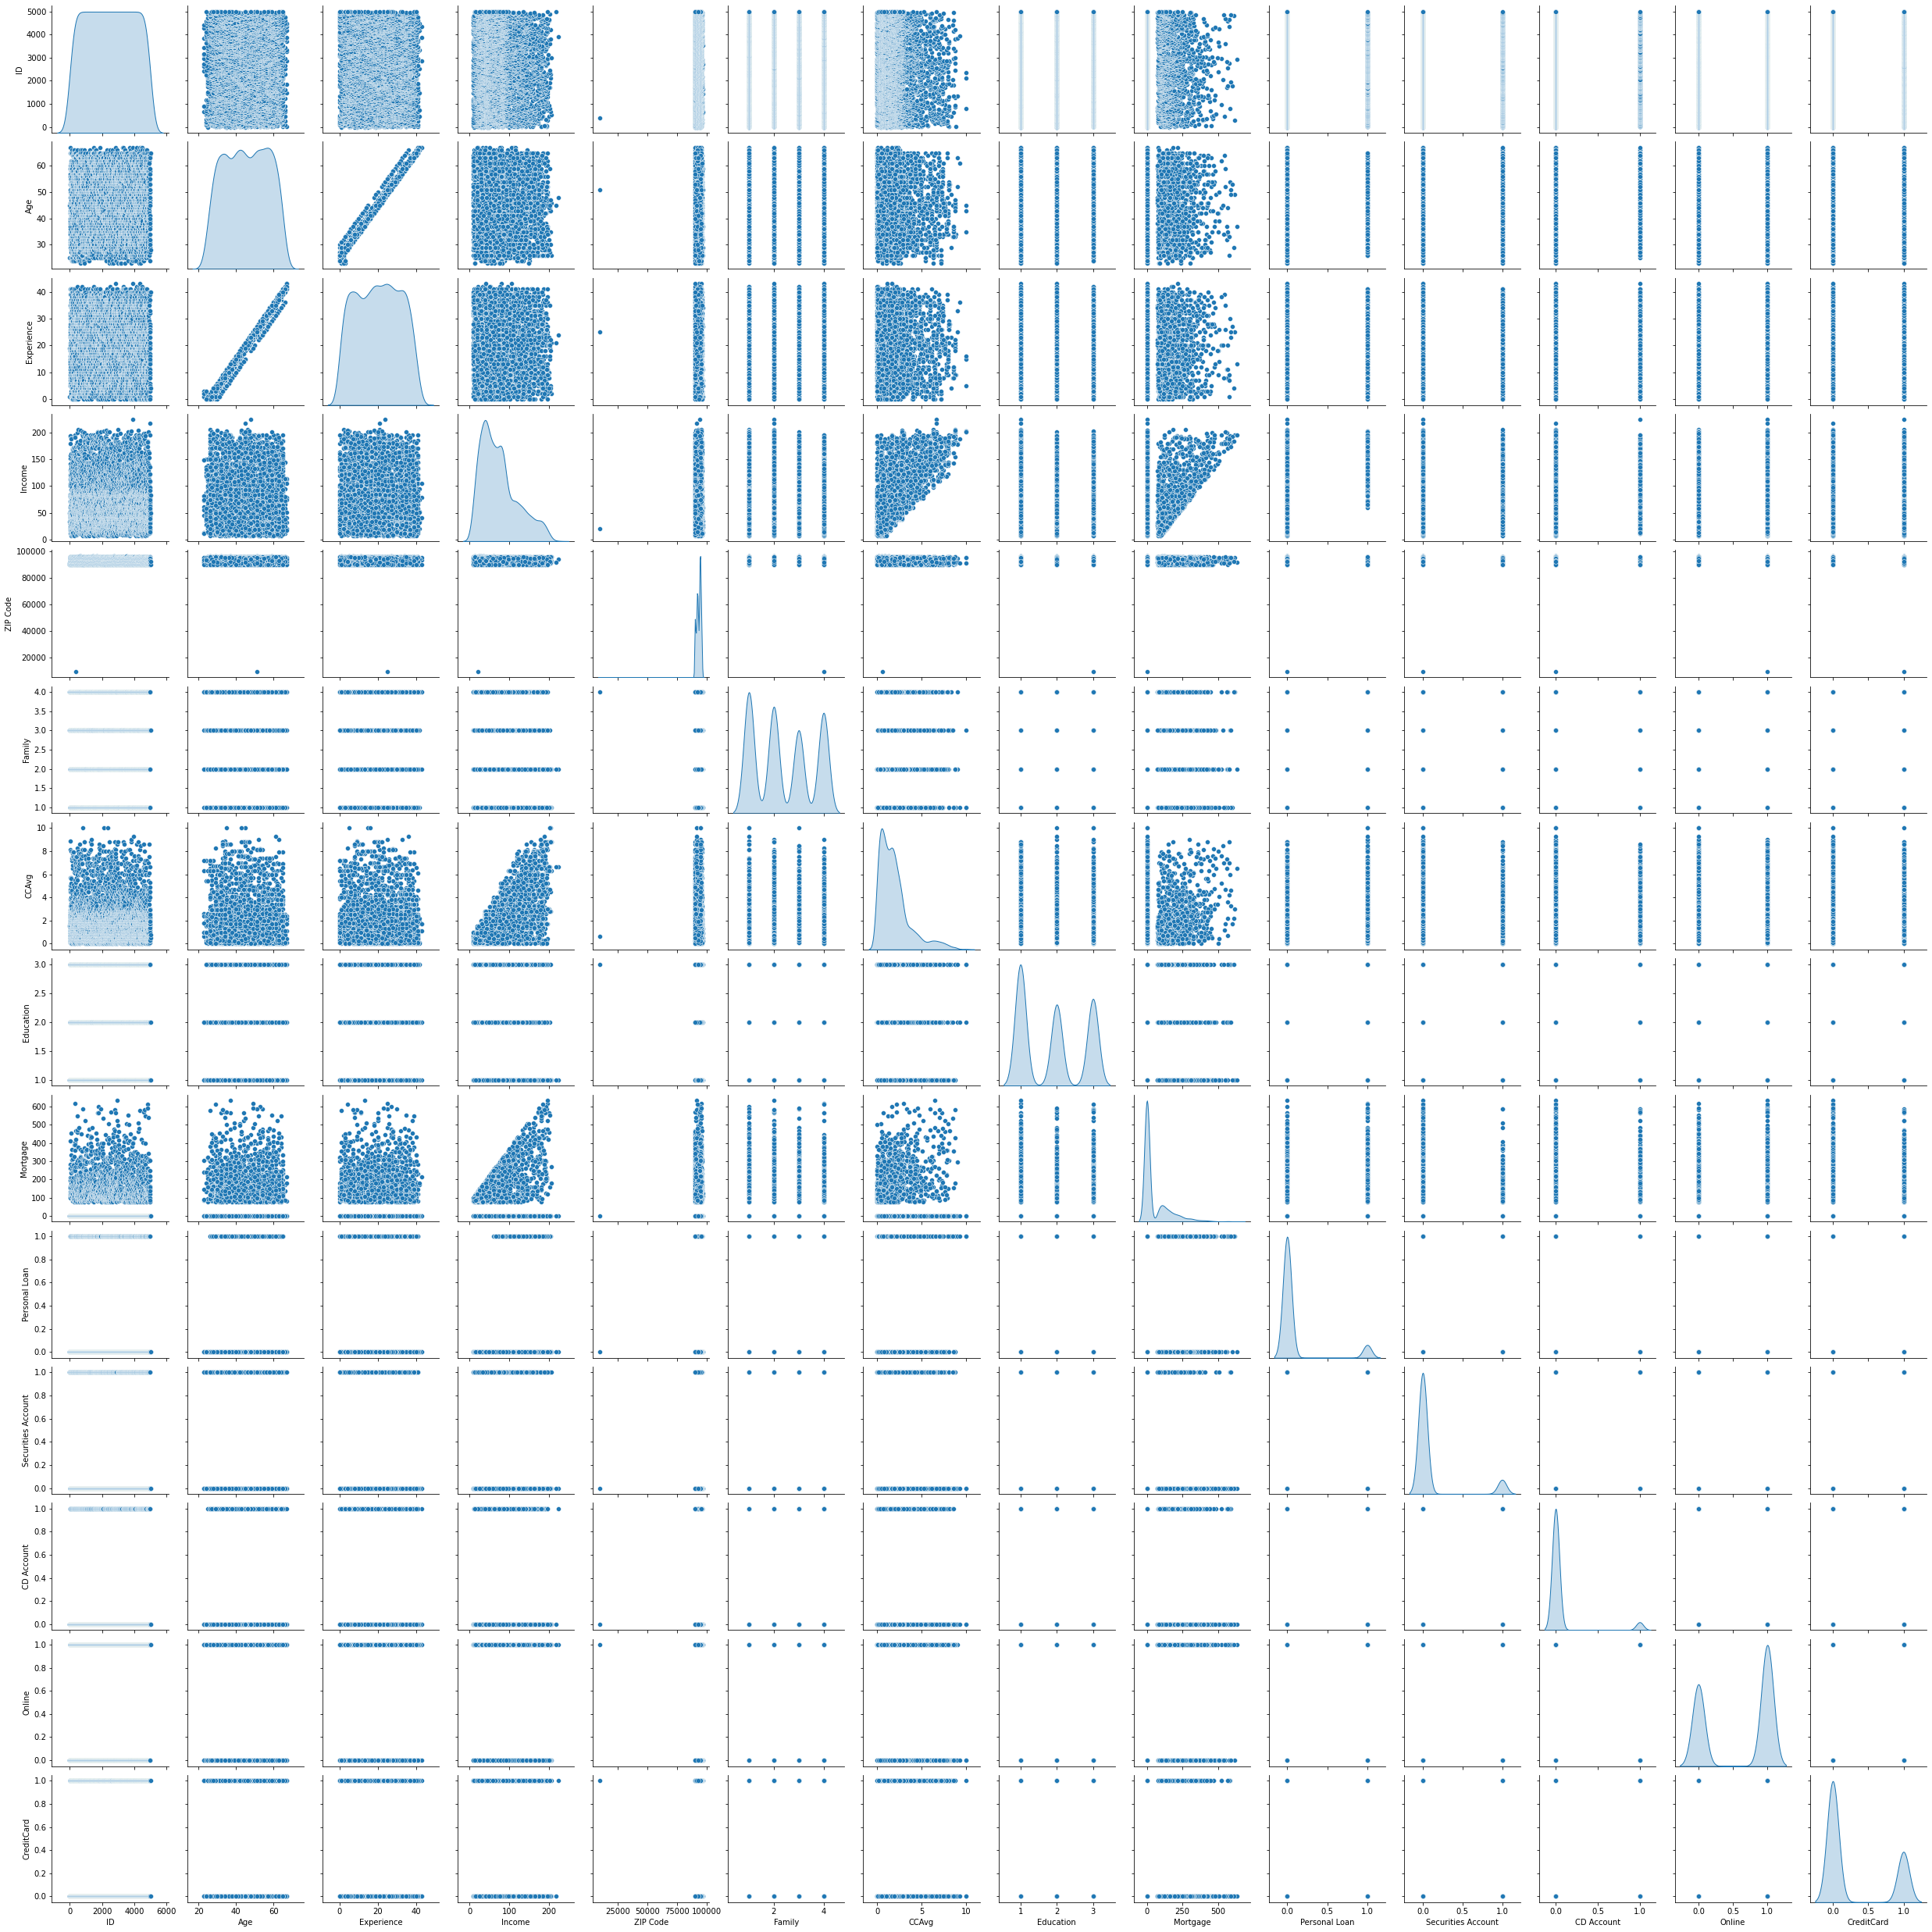

In [15]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [16]:
df[df['Experience']<0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [17]:
ages = list(df[df['Experience']<0]['Age'].unique())
indexes = df[df['Experience']< 0].index.tolist()
print(ages)
print(indexes)

[]
[]


In [18]:
for i in indexes:
    for a in ages:
        t = df.loc[i, 'Experience'] =df[(df.Age==a) & (df.Experience >0)]['Experience'].mean()
    print(t)
        

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [20]:
df[df['Experience']<0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [21]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### Target Variable is Personal Loan

In [22]:
vc = df[['Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

# Value counts of all the category column with two unique values (0,1)

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,480,4520
1,Securities Account,522,4478
2,CD Account,302,4698
3,Online,2984,2016
4,CreditCard,1470,3530


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

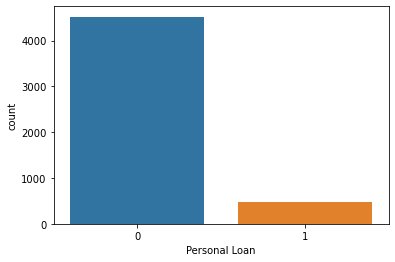

In [23]:
sns.countplot(data = df, x = 'Personal Loan')

In [24]:
def get_ct(df,var, var2):
    ct_res = pd.crosstab(df[var], df[var2], margins = True)
    ct_res['Approved (%)'] = round(ct_res[1]/ct_res['All']*100, 2)
    return ct_res.drop(columns = 'All')

get_ct(df, 'CreditCard', 'Personal Loan')

Personal Loan,0,1,Approved (%)
CreditCard,,,
0,3193,337,9.55
1,1327,143,9.73
All,4520,480,9.60


In [25]:
get_ct(df, 'Online', 'Personal Loan')

Personal Loan,0,1,Approved (%)
Online,,,
0,1827,189,9.38
1,2693,291,9.75
All,4520,480,9.60


In [26]:
get_ct(df, 'Education', 'Personal Loan')

Personal Loan,0,1,Approved (%)
Education,,,
1,2003,93,4.44
2,1221,182,12.97
3,1296,205,13.66
All,4520,480,9.60


In [27]:
get_ct(df, 'Family', 'Personal Loan')

Personal Loan,0,1,Approved (%)
Family,,,
1,1365,107,7.27
2,1190,106,8.18
3,877,133,13.17
4,1088,134,10.97
All,4520,480,9.60


In [28]:
get_ct(df, 'CD Account', 'Personal Loan')

Personal Loan,0,1,Approved (%)
CD Account,,,
0,4358,340,7.24
1,162,140,46.36
All,4520,480,9.60


In [29]:
def get_sct(df,star_var, var):
    ct_res = pd.crosstab(index =[df[star_var], df[var]], columns = df['Personal Loan'], margins = True)
    ct_res['Approved (%)'] = round(ct_res[1]/ct_res['All']*100, 2)
    return ct_res.drop(columns = 'All').drop('All', level=0)

get_sct(df, 'Online', 'Family')

Personal Loan    0   1  Approved (%)
Online Family                       
0      1       550  39          6.62
       2       506  42          7.66
       3       348  51         12.78
       4       423  57         11.88
1      1       815  68          7.70
       2       684  64          8.56
       3       529  82         13.42
       4       665  77         10.38

In [30]:
get_sct(df, 'Online', 'Education')

Personal Loan        0    1  Approved (%)
Online Education                         
0      1           799   42          4.99
       2           482   61         11.23
       3           546   86         13.61
1      1          1204   51          4.06
       2           739  121         14.07
       3           750  119         13.69

Text(0.5, 1.0, 'Age')

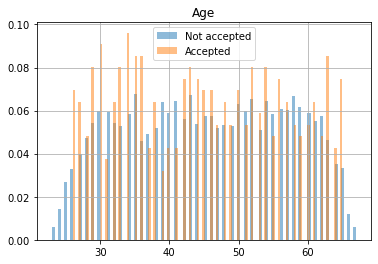

In [31]:
df['Age'][df['Personal Loan']==0].hist(bins = 100, density = True, alpha = 0.5, label = 'Not accepted')
df['Age'][df['Personal Loan']==1].hist(bins = 100, density = True, alpha = 0.5, label = 'Accepted')
plt.legend()
plt.title('Age')

Text(0.5, 1.0, 'Mortgage')

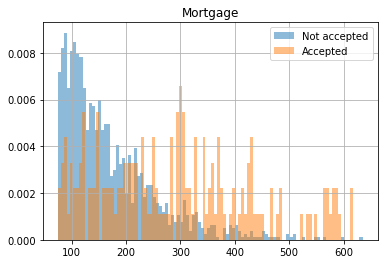

In [32]:
df['Mortgage'][(df['Personal Loan']==0) & (df['Mortgage']>0)].hist(bins = 100, density = True, alpha = 0.5, label = 'Not accepted')
df['Mortgage'][(df['Personal Loan']==1) & (df['Mortgage']>0)].hist(bins = 100, density = True, alpha = 0.5, label = 'Accepted')
plt.legend()
plt.title('Mortgage')

Text(0.5, 1.0, 'Income')

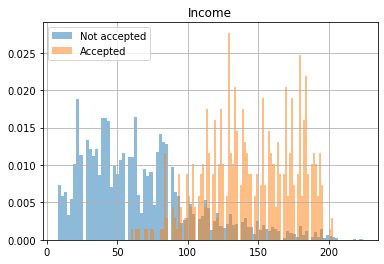

In [33]:
df['Income'][(df['Personal Loan']==0) ].hist(bins = 100, density = True, alpha = 0.5, label = 'Not accepted')
df['Income'][(df['Personal Loan']==1) ].hist(bins = 100, density = True, alpha = 0.5, label = 'Accepted')
plt.legend()
plt.title('Income')

Text(0.5, 1.0, 'Avg. credit card spend')

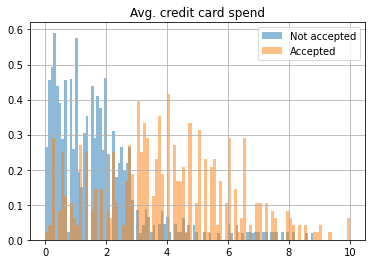

In [34]:
df['CCAvg'][(df['Personal Loan']==0) ].hist(bins = 100, density = True, alpha = 0.5, label = 'Not accepted')
df['CCAvg'][(df['Personal Loan']==1) ].hist(bins = 100, density = True, alpha = 0.5, label = 'Accepted')
plt.legend()
plt.title('Avg. credit card spend')

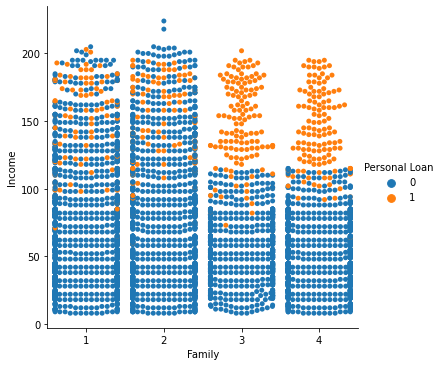

In [35]:
sns.catplot(x='Family', y = 'Income', hue = 'Personal Loan', data = df, kind = 'swarm')

In [36]:
#### Additional, (try it out after the first few iterations)
#pd.crosstab(df['Personal Loan'], df['CreditCard'],normalize='columns')
#df.drop('CreditCard',axis=1,inplace=True)
#sns.distplot(df[df['Personal Loan']==0]['Mortgage'],color='r',label=0)
#sns.distplot(df[df['Personal Loan']==1]['Mortgage'],color='g',label=1)
#plt.legend()
#plt.show()

In [37]:
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')

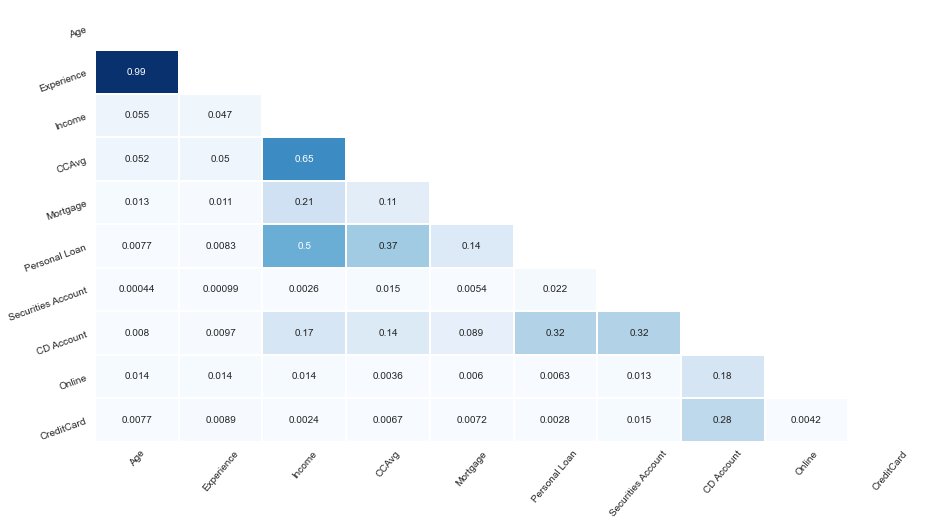

In [38]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`Age and Experience has 0.99 correlation therefore dropping Experience`

In [39]:
# Age and experience have strong positive relation
# Age and Experience have uniform distribution
# Income is positively skewed

In [40]:
### First run the model without dropping Expereince and see the coeffeicient, it will show you how colinearity impacts the solution
### Then in the next iteration drop it and see the results again
df.drop('Experience',axis=1,inplace=True)

In [41]:
## Additional

### New variable extracted from mortgage

df['Mortgage_category'] = df['Mortgage'].apply(lambda x:1 if x>=1 else 0)
# Here, lambda function gives output as 1 whenever 'Mortgage' value is greater than or equal to 1 else it gives 0
## These outputs are stored ina new column 'Mortgage_category'

df['Mortgage_category'] = df['Mortgage_category'].astype('category') # Converting column to 'category' datatype

df['Mortgage_category'].value_counts()

0    3462
1    1538
Name: Mortgage_category, dtype: int64

### 3]  	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [42]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = df.loc[:, df.columns != 'Personal Loan']  # independent variables

y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [43]:
x = pd.get_dummies(x,drop_first=True)

In [44]:
y.head()  

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [45]:
x.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
0,25,49,1.6,0,1,0,0,0,0,0,1,0,0,0
1,45,34,1.5,0,1,0,0,0,0,1,0,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,0,1,0,0
4,35,45,1.0,0,0,0,0,1,0,0,1,1,0,0


In [46]:
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn import metrics
X_train,xtest,y_train,ytest = train_test_split(x,y,test_size=0.3,random_state=7)
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.119672
         Iterations 9


## Using stats model

In [47]:
stats.chisqprob = lambda chisq, df:stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.6261
Time:                        11:28:57   Log-Likelihood:                -418.85
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                4.671e-291
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.8354      0.759    -16.903      0.000     -14.324     -11.347
Age                     0.0076      0.008      0.946      0.344      -0.008       0.023
Income          

In [65]:
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']= lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by = "Odds_ratio", ascending =False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,3.93,50.71,0.98,0.00
Education_2,3.70,40.60,0.98,0.00
CD Account,3.47,32.13,0.97,0.00
Family_3,2.00,7.35,0.88,0.00
Family_4,1.87,6.52,0.87,0.00
CCAvg,0.19,1.22,0.55,0.00
Income,0.06,1.06,0.52,0.00
Online,-0.63,0.53,0.35,0.00
Securities Account,-0.73,0.48,0.33,0.04
CreditCard,-0.96,0.38,0.28,0.00


In [66]:
lgcoef

,coef,Odds_ratio,probability,pval
Education_3,3.93,50.71,0.98,0.00
Education_2,3.70,40.60,0.98,0.00
CD Account,3.47,32.13,0.97,0.00
Family_3,2.00,7.35,0.88,0.00
Family_4,1.87,6.52,0.87,0.00
Mortgage_category_1,0.51,1.67,0.63,0.17
CCAvg,0.19,1.22,0.55,0.00
Income,0.06,1.06,0.52,0.00
Age,0.01,1.01,0.50,0.34
Mortgage,-0.00,1.00,0.50,0.61


### 4]  Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [49]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [50]:
xtrain.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
717,59,94,0.50,0,0,0,0,1,0,1,0,0,0,0
2496,63,32,0.70,141,0,0,0,0,0,1,0,1,0,1
2469,43,89,0.10,307,0,0,0,1,0,0,0,1,0,1
1375,50,179,2.90,0,0,0,0,1,0,0,0,0,1,0
2742,39,89,0.40,0,0,0,1,0,1,0,0,0,0,0


In [51]:
xtest.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
3406,42,34,2.00,0,0,0,0,1,0,1,0,0,1,0
757,52,81,1.80,0,1,0,0,0,0,1,0,1,0,0
3624,58,70,1.40,0,0,0,0,0,0,0,0,0,1,0
4544,28,80,2.50,0,0,0,1,0,0,1,0,0,0,0
3235,60,39,1.60,0,0,0,1,0,1,0,0,0,1,0


#### Base Model

In [52]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(random_state=7)

In [53]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(xtest, ytest))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.9562857142857143

Testing accuracy 0.9646666666666667


In [54]:
#### Here the model performs better in testing than training. Therefore, it is a good model

In [55]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## importing necessary metrics to evaluate model performance

In [56]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

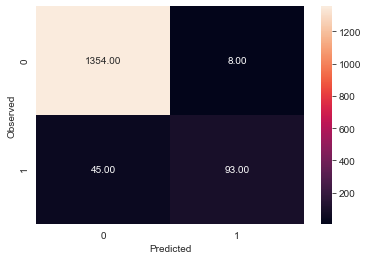

In [57]:
draw_cm(ytest,y_predict)

In [58]:
recall_score(ytest,y_predict)

0.6739130434782609

In [59]:
precision_score(ytest,y_predict)

0.9207920792079208

In [60]:
f1_score(ytest,y_predict)

0.7782426778242678

In [61]:
roc_auc_score(ytest,y_predict)

0.8340196641767221

In [62]:
 !pip install yellowbrick

     |████████████████████████████████| 269 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 29.0 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 7.9 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 8.5 MB 8.4 MB/s eta 0:00:01
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
     |████████████████████████████████| 61 kB 351 kB/s eta 0:00:011
     |████████████████████████████████| 2.2 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 3.8 MB/s eta 0:00:01


In [64]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [63]:
knn_model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [64]:
predicted_labels = knn_model.predict(xtest)

In [65]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

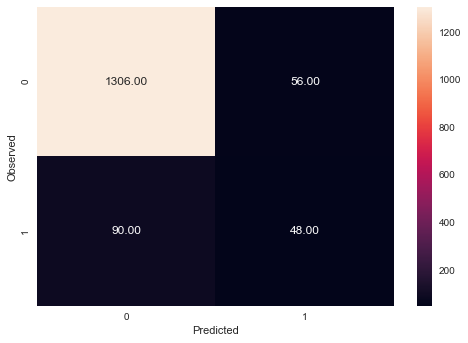

In [66]:
draw_cm(ytest,predicted_labels)

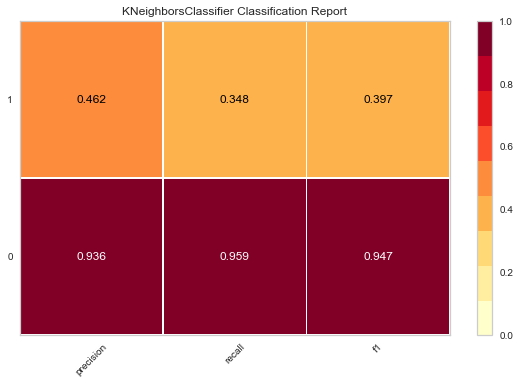

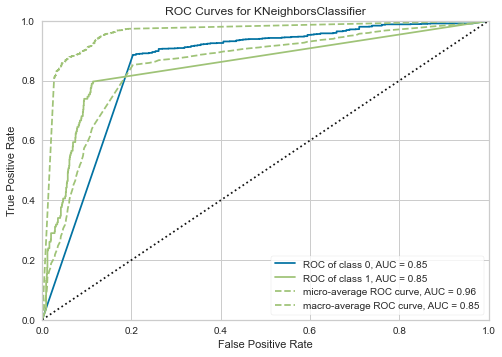

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [67]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(knn_model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(knn_model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

In [68]:
nb_model = GaussianNB()
y_pred = nb_model.fit(xtrain, ytrain).predict(xtest)


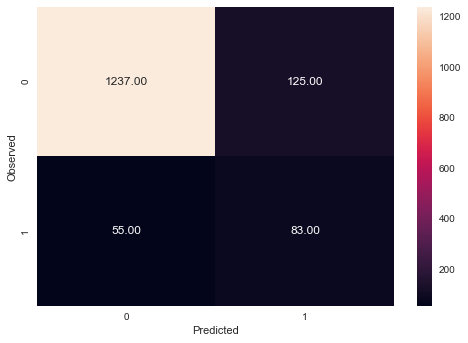

In [69]:
draw_cm(ytest,y_pred)

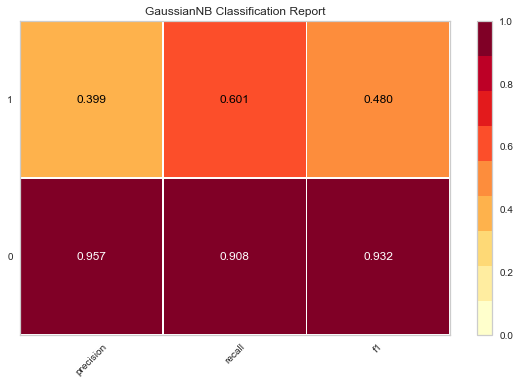

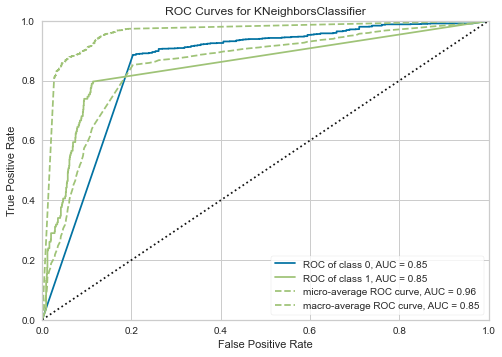

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [70]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(nb_model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(knn_model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

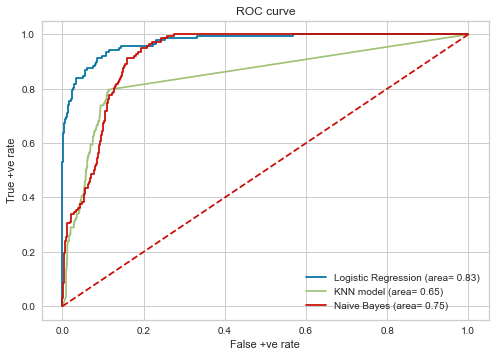

In [71]:
plt.figure()
logit_roc_auc = roc_auc_score(ytest, model.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])
plt.plot(fpr, tpr, label = 'Logistic Regression (area= %0.2f)' % logit_roc_auc)
knn_roc_auc = roc_auc_score(ytest, knn_model.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, knn_model.predict_proba(xtest)[:,1])
plt.plot(fpr, tpr, label = 'KNN model (area= %0.2f)' % knn_roc_auc)
nb_roc_auc = roc_auc_score(ytest, nb_model.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, nb_model.predict_proba(xtest)[:,1])
plt.plot(fpr, tpr, label = 'Naive Bayes (area= %0.2f)' % nb_roc_auc)

plt.plot([0,1],[0,1],'r--')
plt.xlabel('False +ve rate')
plt.ylabel('True +ve rate')
plt.title('ROC curve')
plt.legend()

In [72]:
xtrain_scaled = preprocessing.scale(xtrain)
xtest_scaled = preprocessing.scale(xtest)

In [73]:
y_predict_scaled =model.fit(xtrain_scaled, ytrain).predict(xtest_scaled) # Logistic reg
y_pred_Scaled = nb_model.fit(xtrain_scaled, ytrain).predict(xtest_scaled) #NB
predicted_labels_scaled = knn_model.fit(xtrain_scaled, ytrain).predict(xtest_scaled) #KNN

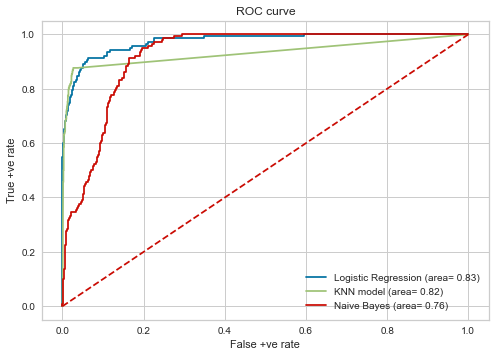

In [74]:
plt.figure()
logit_roc_auc = roc_auc_score(ytest, model.predict(xtest_scaled ))
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest_scaled )[:,1])
plt.plot(fpr, tpr, label = 'Logistic Regression (area= %0.2f)' % logit_roc_auc)
knn_roc_auc = roc_auc_score(ytest, knn_model.predict(xtest_scaled ))
fpr, tpr, thresholds = roc_curve(ytest, knn_model.predict_proba(xtest_scaled )[:,1])
plt.plot(fpr, tpr, label = 'KNN model (area= %0.2f)' % knn_roc_auc)
nb_roc_auc = roc_auc_score(ytest, nb_model.predict(xtest_scaled ))
fpr, tpr, thresholds = roc_curve(ytest, nb_model.predict_proba(xtest_scaled )[:,1])
plt.plot(fpr, tpr, label = 'Naive Bayes (area= %0.2f)' % nb_roc_auc)

plt.plot([0,1],[0,1],'r--')
plt.xlabel('False +ve rate')
plt.ylabel('True +ve rate')
plt.title('ROC curve')
plt.legend()

In [75]:
print('KNN')
print(metrics.classification_report(ytest, predicted_labels))
print('Logit')
print(metrics.classification_report(ytest, y_predict))

KNN
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1362
           1       0.46      0.35      0.40       138

    accuracy                           0.90      1500
   macro avg       0.70      0.65      0.67      1500
weighted avg       0.89      0.90      0.90      1500

Logit
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1362
           1       0.94      0.67      0.78       138

    accuracy                           0.97      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.97      0.97      0.96      1500



In [76]:
print('KNN')
print(metrics.classification_report(ytest, predicted_labels_scaled))
print('Logit')
print(metrics.classification_report(ytest, y_predict_scaled))

KNN
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.91      0.65      0.76       138

    accuracy                           0.96      1500
   macro avg       0.94      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500

Logit
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.90      0.67      0.77       138

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



### 5] Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [77]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = xtrain.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
1,Income,2.69
12,Education_3,1.70
11,Education_2,1.57
5,CD Account,0.79
10,Family_4,0.77
9,Family_3,0.76
7,CreditCard,0.42
2,CCAvg,0.34
6,Online,0.30
4,Securities Account,0.22


In [78]:
# Observe the predicted and observed classes in a dataframe.

z = xtest.copy()
z['Observed Loan Status'] = ytest
z['Predicted Loan Status'] = y_predict
z[z['Observed Loan Status']!=z['Predicted Loan Status']]

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1,Observed Loan Status,Predicted Loan Status
4575,53,115,0.50,0,0,0,0,0,1,0,0,0,1,0,1,0
3383,46,135,4.10,213,0,0,1,0,0,1,0,0,0,1,1,0
459,35,200,3.00,458,0,0,0,0,1,0,0,0,0,1,0,1
2304,27,170,4.70,0,0,0,1,0,0,1,0,0,0,0,1,0
1731,43,125,2.40,0,0,0,1,0,0,1,0,0,0,0,1,0
2996,42,103,3.33,0,1,1,1,1,0,0,0,0,0,0,1,0
3983,39,93,3.60,0,0,0,1,0,0,0,1,0,1,0,1,0
1793,35,113,0.80,0,0,0,1,0,0,1,0,0,1,0,1,0
3612,50,99,4.60,368,1,1,0,1,0,0,0,0,0,1,1,0
183,29,148,4.10,0,0,0,1,0,0,1,0,0,0,0,1,0


`81 rows where predicted target variable is not equal to actual target variable`

### 6] Give conclusion related to the Business understanding of your model? (5 marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted Personal loan will be taken and the customer took it

*False Positive (observed=0,predicted=1):*

Predicted Personal loan will be taken and the customer did not take it

*True Negative (observed=0,predicted=0):*

Predicted Personal loan will not be taken and the customer did not take it

*False Negative (observed=1,predicted=0):*

Predicted Personal loan will not be taken and the customer took it

##### `Important Features`

"Education_2", "CD Account", "Education_3", "Family_3", "Family_4" 
seems to be top 5 features which influence the model's output. Based on the coefficients value.

"Age" and "Mortgage" doesn't play any role in predicting the target variable.

##### `Important Metric`

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. **less number of False Negative**, so that bank doesn't lose real customers who want to take loan. Hence the **focus should be on increasing Recall**.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.